# Time series analysis & Demand forecasting 

## Store sales prediction

## Abstract

Company description:

**Why is Sales important to Business and How does sales forecasting help business ?**
<p>Sales are an important aspect for any business as it generates the revenue to keep the business running. They are also used as the basis for data driven business decisions such as resource allocation and promotional strategies. It is therefore very important to analyze the sales patterns to understanding the market and forecast sales to develop robust business strategies.</p>
<br>

**How will the daily sales prediction benefit business ?**
<p> Daily sales forecasting enables the business to inspect the detailed patterns of sales as well as to have a quicker reaction time in the event of change in these trends. For instance, a drop in total sales would be quickly identified in daily forecasting and can trigger further analysis into the causes resulting in the development of counter strategies to improve the sales.</p>
<br>

**Sales forecating as a Time series problem ?**
<p> Sales forecasting involves predicting future sales for a specified timeframe. Since the data at our disposal contains daily total sales records indexed by their dates, it forms the premise for a time series analysis to analyze the trend and seasonality of the data and model the fluctuation in sales happening over time.</p>


The aim of this project is to apply machine learning algorithm into this real world problem




## Dataset

**The dataset is composed of two files:**
1. 	Sales data: The dataset consists of daily sales records of 1115 stores for January 2013 – August 2015 time period (942 Days) along with details such as store open/close, state holiday, promotional offers, number of customers.
2. 	Store data: Each store also has additional details such as store type, promotional off and competition details  like distance, open since.

**The sales data is indexed by date and is also missing records for some stores for certain dates due to refurbishment of stores.**


## Goal: <span style = "font-size: 0.8em; font-weight:normal;">Explore the data and predict next 6 weeks of daily sales for more than a thousand stores </span>

## Business Application

**The daily sales forecast is used to support a variety of data driven business decisions such as:**
1. 	Streamlining the hiring process, training and resource allocation to provide improved customer experience.
2. 	Stabilize inventory management and manage supply chain logistics.
3. 	Developing promotional strategies to increase sales and total revenue .
4. 	Identifying early warning signs and developing strategies to deal with unexpected and unfavorable situations.


## Approach

1. Data Cleaning:
2. Data Exploration:
3. Time Series Data Preparation
4. Data Modeling:
    1.     Facebook Prophet – Statistical model
    2.     LSTM – Deep learning RNN
5. Evaluation: RMSE, MAE


In [233]:
# Import required libraries
import numpy as np
import pandas as pd, datetime


In [234]:
# Libraries import for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [235]:
# Importing store data
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [236]:
store.shape

(1115, 10)

In [237]:
# Importing train data
train = pd.read_csv('train.csv',low_memory = False )
train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [238]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [239]:
# Importing test data
test = pd.read_csv('test.csv')
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


## Exploratory Data Analysis

### Variable Identification

In [240]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [241]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [242]:
train.shape

(1017209, 9)

In [243]:
train['Store'].value_counts()

1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

In [244]:
train['Date'].max()

'2015-07-31'

In [245]:
train['Date'].min()

'2013-01-01'

In [246]:
train.keys()

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

### Checking missing values in train data

In [247]:
# Checking missing values in store data 
train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### There are no missing values in train data

### To check the level of data

In [248]:
#To check level of data
for column in train.columns:
    if train[column].nunique() == len(train):
        print(column)

print("Not a single primary key")
        

Not a single primary key


In [249]:
# # Checking for composite keys in train data

# from itertools import combinations, chain

# full_list = chain.from_iterable(combinations(train, i) for i in range(1, len(train.columns)+1))

# n = len(train.index)

# res = []
# for cols in full_list:
#     cols = list(cols)
#     if len(train[cols].drop_duplicates().index) == n:
#         res.append(cols)

# print(len(res))  # 128

In [250]:
# print("Level of data is", res[0])

In [251]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


### Checking for the time series form of data

In [252]:
#For a single date
train.loc[(train['Date'] == '2015-07-31')]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1110,1111,5,2015-07-31,5723,422,1,1,0,1
1111,1112,5,2015-07-31,9626,767,1,1,0,1
1112,1113,5,2015-07-31,7289,720,1,1,0,1
1113,1114,5,2015-07-31,27508,3745,1,1,0,1


### For a single date, information of differnt stores are present 

In [253]:
#For a single store
train.loc[(train['Store'] == 1)]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


In [254]:
train['Date'].nunique()

942

In [255]:
# Looking at distinct values of dates for each store
train.groupby('Store')['Date'].count().head(20)

Store
1     942
2     942
3     942
4     942
5     942
6     942
7     942
8     942
9     942
10    942
11    942
12    942
13    758
14    942
15    942
16    942
17    942
18    942
19    942
20    758
Name: Date, dtype: int64

#### It can be seen that sales record for all the 942 dates are present for many stores, so can say that the data we have at our disposal comprises time series as it is an ordered sequence of Sales at equally spaced time intervals(date level)

 Store:
 1. There are 1115 distinct stores in data
 
 Train:
 1. Training data has 1M+ observations containing information of 1115 stores 
 
 2. Data is for time period from Jan 2013 to August 2015 and has 2+ years worth data
 
 3. Train data is at "Store and Date" level, implying the combination of store and date is unique for each row
 
 4. Each store has all dates(942) associated with it

### Univariate analysis

In [256]:
# statistical summary of numerical data attributes
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [257]:
# statistical summary of categorical data attributes
train.describe(include = np.object)

,Date,StateHoliday
count,1017209,1017209
unique,942,4
top,2015-02-21,0
freq,1115,986159


#### Univariate analysis - Store 

In [258]:
train["Store"].value_counts()

1023    942
666     942
675     942
163     942
674     942
       ... 
900     758
902     758
903     758
904     758
512     758
Name: Store, Length: 1115, dtype: int64

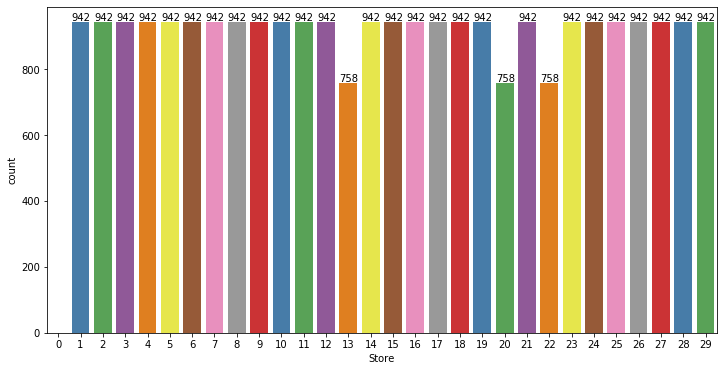

In [259]:
# Checking the store distribution in data
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "Store", data = train, 
                   palette="Set1",
                   order = train['Store'].iloc[:30].index
                  )

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), 
                    (p.get_x()+0.0, p.get_height()+5))

### All 1115 stores do not have records for all 942 days, some stores have only 758 days of records. So we will further analyze to see the number of such stores having lesser than 942 days of records

In [260]:
#Checking which stores have missing records for some dates

def find_stores_with_missing_dates(store_value_counts):
    '''
    store_value_counts is a series of total count of records for all 1115 stores
    '''
    stores_with_missing_dates = []

    for store, count in store_value_counts.iteritems():
        if count < 942:
            stores_with_missing_dates.append([store,count])

    return(stores_with_missing_dates, len(stores_with_missing_dates))

    

In [261]:
# Calling above function and storing
store_value_counts = train["Store"].value_counts()
stores_with_missing_dates, total_number_stores_with_missing_dates = find_stores_with_missing_dates(store_value_counts)

In [262]:
total_number_stores_with_missing_dates

181

### It is seen that there are 181 stores which have fewer than 942 days of records assosiciated with them 

In [263]:
train_date_value_counts = train['Date'].value_counts()

In [264]:
train_date_value_counts

2015-02-21    1115
2013-11-15    1115
2015-01-26    1115
2013-07-21    1115
2015-02-18    1115
              ... 
2014-07-06     935
2014-10-10     935
2014-07-14     935
2014-12-15     935
2014-12-06     935
Name: Date, Length: 942, dtype: int64

In [265]:
# Checking the dates for which records are missing for these 181 above stores 

def find_dates_missing_store(train_date_value_counts):
    
    dates_missing_stores = []
    
    for items in train_date_value_counts.iteritems():
        if items[1] < 1115:
            dates_missing_stores.append(items[0])
            
    dates_missing_stores = pd.DataFrame(dates_missing_stores)  #converting into dataframe
    dates_missing_stores.columns = ['Date']                    #changing column name
    
    dates_missing_stores['Date'] = pd.to_datetime(dates_missing_stores.Date)  # Converting date object to datetime
    
    dates_missing_stores = dates_missing_stores.sort_values(by = 'Date').reset_index(drop = True)  #sorting dates
    
    return(dates_missing_stores, len(dates_missing_stores))
    
           

In [266]:
dates_missing_stores, total_number_dates_missing_stores  = find_dates_missing_store(train_date_value_counts)

In [267]:
total_number_dates_missing_stores

185

In [268]:
dates_missing_stores

,Date
0,2013-01-01
1,2014-07-01
2,2014-07-02
3,2014-07-03
4,2014-07-04
...,...
180,2014-12-27
181,2014-12-28
182,2014-12-29
183,2014-12-30


### Conclusion
1. There are 185 days(6 months) for which records are not available for all 1115 stores
2. For 180 stores out of total 1115 stores available, 6 months of data is missing from July 1 2014 to Dec 31 2014 
3. There is 1 store (store ID - 988) has missing record on just 1 day which is Jan 1 2013.

Action to be taken:
1. Since these 180 stores have missing data for dates in between the range of consideration which is Jan 1 2012 to July 31 2015, this can affect the time series prediction. Hence, we will be removing these "stores" from training dataset
2. 1 store with store ID of 988 will be imputed with mean values of all columns and this store will not be dropped for building time series model



In [269]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [270]:
# Getting stores whose count is 758
store_with_758_counts = train['Store'].value_counts()[train['Store'].value_counts() == 758]

In [271]:
store_with_758_counts = store_with_758_counts.to_frame()

In [272]:
type(store_with_758_counts)

pandas.core.frame.DataFrame

In [273]:
store_with_758_counts.columns

Index(['Store'], dtype='object')

In [274]:
#Resetting index as previous index is actually store numbers
store_with_758_counts.reset_index(level=0, inplace=True)

In [275]:
store_with_758_counts.columns

Index(['index', 'Store'], dtype='object')

In [276]:
store_with_758_counts.columns = ['Store', 'Count of stores']

In [277]:
store_with_758_counts.columns

Index(['Store', 'Count of stores'], dtype='object')

In [278]:
store_with_758_counts['Store']

0      547
1       46
2       20
3       13
4      542
      ... 
175    900
176    902
177    903
178    904
179    512
Name: Store, Length: 180, dtype: int64

In [279]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [280]:
# apply "Vlookup" in pandas, matching stores values whose count is 758 with the train data 
# to extract dates for these stores

store_758_train_merge = store_with_758_counts.merge(train, on='Store')
store_758_train_merge.tail()

,Store,Count of stores,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
136435,512,758,6,2013-01-05,0,0,0,0,0,0
136436,512,758,5,2013-01-04,0,0,0,0,0,1
136437,512,758,4,2013-01-03,1886,502,1,0,0,1
136438,512,758,3,2013-01-02,2743,791,1,0,0,1
136439,512,758,2,2013-01-01,2646,625,1,0,a,1


In [281]:
len(store_758_train_merge)

136440

In [282]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [283]:
store_758_train_merge['Store'].nunique()

180

In [284]:
x = store_758_train_merge.groupby('Store')['Date'].min()

In [285]:
for y in x.iteritems():
    if y[1] != '2013-01-01':
        print(y[0])
#     else:
#         print("no")

In [286]:
train[train['Store'] == 13]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
12,13,5,2015-07-31,8821,568,1,1,0,0
1127,13,4,2015-07-30,7648,474,1,1,0,0
2242,13,3,2015-07-29,6648,406,1,1,0,0
3357,13,2,2015-07-28,6819,446,1,1,0,0
4472,13,1,2015-07-27,7926,527,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1011647,13,6,2013-01-05,4285,344,1,0,0,0
1012762,13,5,2013-01-04,3848,340,1,0,0,1
1013877,13,4,2013-01-03,3674,292,1,0,0,1
1014992,13,3,2013-01-02,3737,317,1,0,0,1


In [287]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [288]:
train['Date'].max()

'2015-07-31'

In [289]:
store_with_758_counts

,Store,Count of stores
0,547,758
1,46,758
2,20,758
3,13,758
4,542,758
...,...,...
175,900,758
176,902,758
177,903,758
178,904,758


In [290]:
train['Store'].value_counts() == 758

1023    False
666     False
675     False
163     False
674     False
        ...  
900      True
902      True
903      True
904      True
512      True
Name: Store, Length: 1115, dtype: bool

In [291]:
train[train['Sales'] == 0].groupby('Open')['Sales'].count()

Open
0    172817
1        54
Name: Sales, dtype: int64

In [292]:
train['Sales'] == 0

0          False
1          False
2          False
3          False
4          False
           ...  
1017204     True
1017205     True
1017206     True
1017207     True
1017208     True
Name: Sales, Length: 1017209, dtype: bool

In [294]:
#len(store_list) # 181 stores do not have data for all dates

In [ ]:
train.groupby('Store')['Date'].max()

In [ ]:
#store_list

In [ ]:
train['Store'].min()

In [ ]:
train['Store'].max()

In [ ]:
store_value_counts.min()

In [ ]:
store_value_counts.max()

In [ ]:
train['Date'].nunique()

## Univariate analysis - Day Of Week

### 1. Distribution of days of week in training data

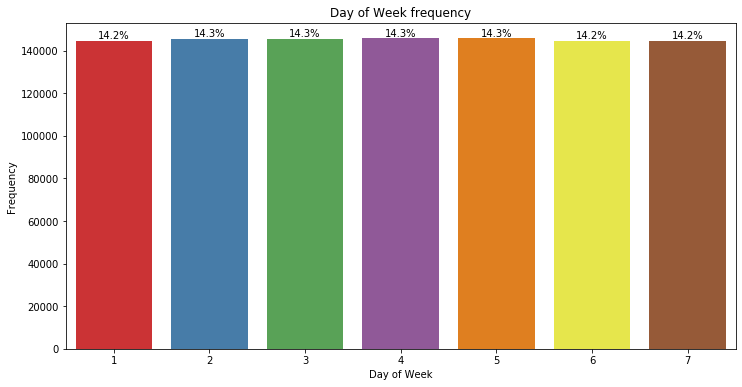

In [295]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "DayOfWeek", data=train, 
                   palette="Set1",
                  )
ax.set(xlabel = "Day of Week", ylabel = "Frequency")
ax.set_title('Day of Week frequency')

#Display count on Bars: 
total=len(train)
for p in ax.patches:
    	ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                    (p.get_x()+0.4, p.get_height()+5),ha='center', va='bottom')

Data about all days of the week is present in almost equal proportion

### 2. Checking on what days of week, the stores were closed

In [296]:
train_store_closed = train[(train.Open == 0)]
train_store_closed.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1


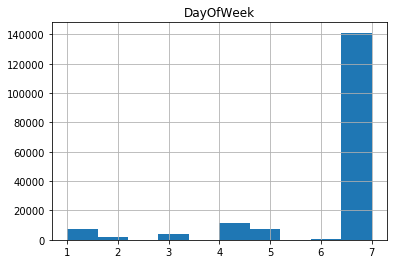

In [297]:
# what days stores were closed the most

train_store_closed.hist('DayOfWeek');

### It can be seen that most of the stores were closed on Sunday, which is not unusual

In [298]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


#### Function for barchart of categorical variables

In [299]:
def univariate_bar_chart(data_col, x_label, y_label, title):
    
    plt.figure(figsize=(5,6))
    ax = sns.countplot(x=data_col,
                       order = data_col.value_counts().index,palette="Set1")
    ax.set(xlabel=x_label, ylabel=y_label)
    ax.set_title(title)

    total=len(data_col) 
    for p in ax.patches:
            ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                        (p.get_x()+0.4, p.get_height()+0.50),ha='center', va='bottom')

### Univariate analysis - Open

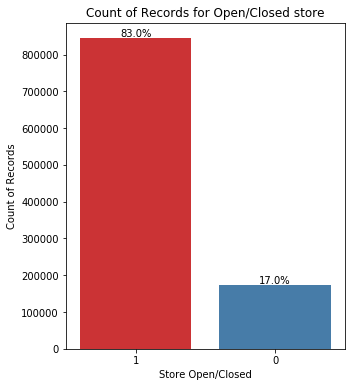

In [300]:
univariate_bar_chart(train['Open'],"Store Open/Closed","Count of Records","Count of Records for Open/Closed store")

### Univariate analysis - Promo

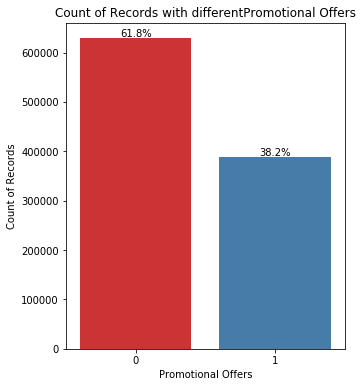

In [301]:
univariate_bar_chart(train["Promo"],"Promotional Offers","Count of Records","Count of Records with different\
Promotional Offers")

### Univariate of Target Numerical variable - Sales

In [302]:
train["Sales"].min()

0

In [ ]:
train["Sales"].max()

### 1. Sales distribution 

In [ ]:
#"Sales" distribution

plt.figure(figsize=(10,7))
plt.xlim(0, 20000)

ax=sns.distplot(train["Sales"],bins=100)
ax.set(xlabel="Sales", ylabel="Probability Density of Sales")
ax.set_title('Sales Distribution ')

In [ ]:
#Checking the skewness
train["Sales"].skew()

In [ ]:
# Checking how many records have sales 0
len(train[train['Sales'] == 0])

In [ ]:
(len(train[train['Sales'] == 0])/len(train['Sales']))*100

17% of data has sales zero. But this can mean that at certain date, some stores didnot make any sale. However, this might be the case that the store was actually closed at those dates giving sales value of zero. So we will check "open" field of train data

### 2. Outliers in sales

In [ ]:
#Boxplot to see outliers
sns.boxplot(data = train["Sales"])

### 3. Analyzing Sales value for Open and Closed stores 

In [ ]:
train.head()

In [303]:
# Checking whethe the stores were open or closed when they had 0 sales
train[train['Sales'] == 0].groupby('Open')['Sales'].count()

Open
0    172817
1        54
Name: Sales, dtype: int64

So, here we can see that sales were mostly zero when store was closed. However, in 54 of the cases sales were zero even when store was "Open". So we will analyze these 54 records now

In [304]:
open_store_zero_sales = train[(train['Sales'] == 0) & (train['Open'] == 1)]

In [305]:
open_store_zero_sales

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
86825,971,5,2015-05-15,0,0,1,0,0,1
142278,674,4,2015-03-26,0,0,1,0,0,0
196938,699,4,2015-02-05,0,0,1,1,0,0
322053,708,3,2014-10-01,0,0,1,1,0,0
330176,357,1,2014-09-22,0,0,1,0,0,0
340348,227,4,2014-09-11,0,0,1,0,0,0
340860,835,4,2014-09-11,0,0,1,0,0,0
341795,835,3,2014-09-10,0,0,1,0,0,0
346232,548,5,2014-09-05,0,0,1,1,0,1
346734,28,4,2014-09-04,0,0,1,1,0,0


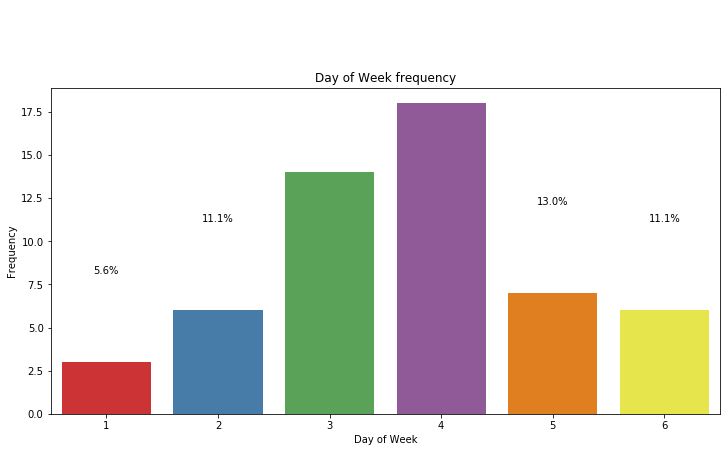

In [306]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = "DayOfWeek", data=open_store_zero_sales, 
                   palette="Set1",
                  )
ax.set(xlabel = "Day of Week", ylabel = "Frequency")
ax.set_title('Day of Week frequency')

#Display count on Bars: 
total=len(open_store_zero_sales)
for p in ax.patches:
    	ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                    (p.get_x()+0.4, p.get_height()+5),ha='center', va='bottom')

In [ ]:
# ax = sns.countplot(x = "AdmitProcedure", data=data, 
#                    order = data['AdmitProcedure'].value_counts().iloc[:10].index, 
#                    palette="Set1",
#                   )

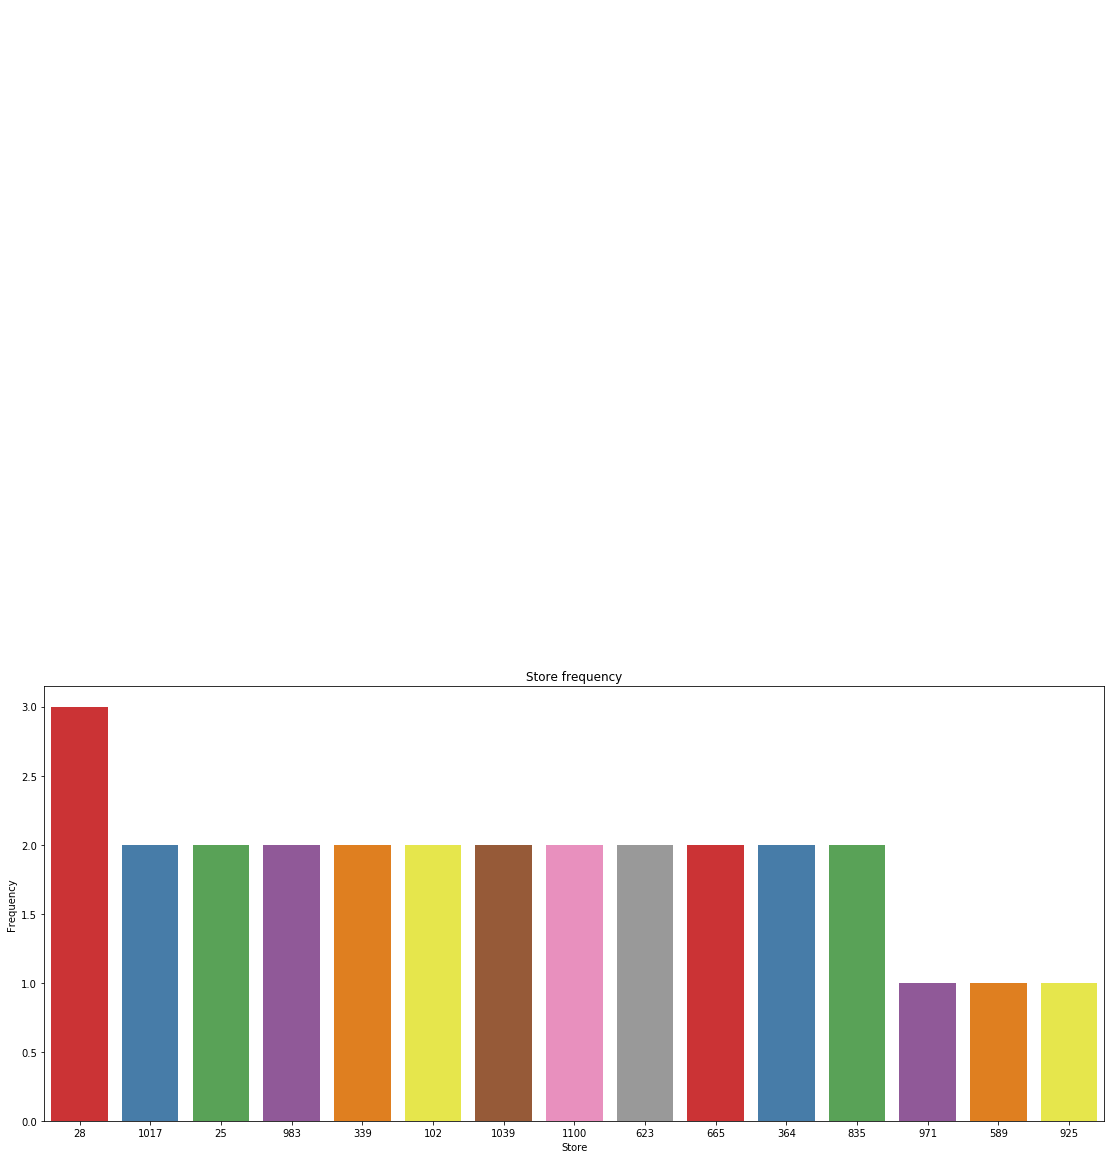

In [307]:
plt.figure(figsize = (19,8))
ax = sns.countplot(x = "Store", data = open_store_zero_sales, 
                   order = open_store_zero_sales['Store'].value_counts().iloc[:15].index,
                   palette="Set1",
                  )
ax.set(xlabel = "Store", ylabel = "Frequency")
ax.set_title('Store frequency')

#Display count on Bars: 
total=len(open_store_zero_sales)
for p in ax.patches:
    	ax.annotate('{:.1f}%'.format(100*p.get_height()/total), 
                    (p.get_x()+0.4, p.get_height()+5),ha='center', va='bottom')

From this, we can see that there are some stores which have not made sales for mare than a single day. So, now we will see if there occur consecutive days or there were some random days

#### Univariate  - Customers

In [ ]:
train["Customers"].min()

In [ ]:
train["Customers"].max()

Text(0.5, 1.0, 'Customers Distribution ')

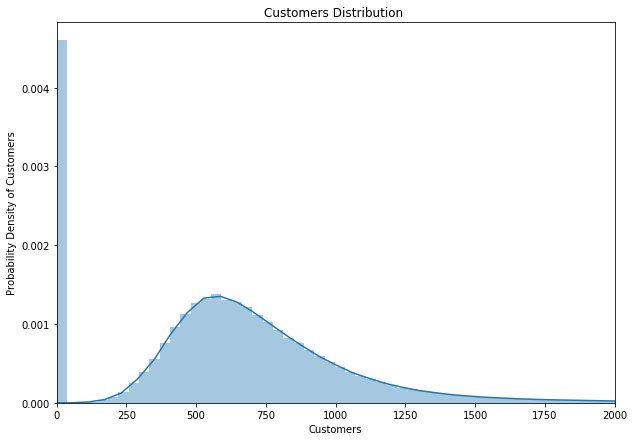

In [308]:
#"Customers" distribution

plt.figure(figsize=(10,7))
plt.xlim(0, 2000)

ax=sns.distplot(train["Customers"],bins=200)
ax.set(xlabel="Customers", ylabel="Probability Density of Customers")
ax.set_title('Customers Distribution ')

In [ ]:
train["Customers"].skew()

In [ ]:
#Boxplot to see outliers
sns.boxplot(data = train["Customers"])

Use cases for bivariate analysis:
1. Store vs sales - which are the stores with most sales
2. Day of the week vs sales
3. Number of Customers vs sales
4. Customers vs Day of week

Multivariate:
1. Stores with most number of customers vs sales

In [ ]:
train.head()

### Store data analysis

In [309]:
# Importing store data
store = pd.read_csv('store.csv')
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [310]:
store.shape

(1115, 10)

In [311]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [312]:
# Checking missing values in store data 
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [313]:
store['CompetitionDistance'].describe()

count     1112.000000
mean      5404.901079
std       7663.174720
min         20.000000
25%        717.500000
50%       2325.000000
75%       6882.500000
max      75860.000000
Name: CompetitionDistance, dtype: float64

#### The variable "CompetitionDistance" has just 3 missing values and on seeing its statistics, we can see that mean value of 5404 will not be a good value to impute the missing value because it is getting influenced by the maximum value of 75860, which itself is quite different and LARGE as compared to the values that majority of data points have.

#### Instead, median can be used to impute the missing values in this variable

### Bivariate analysis

#### To check whether missing values in promo dates is because of the no promotion was applied 

In [314]:
store[store['Promo2SinceWeek'].isnull()].groupby('Promo2')['Promo2'].count()

Promo2
0    544
Name: Promo2, dtype: int64

In [315]:
store[store['Promo2SinceYear'].isnull()].groupby('Promo2')['Promo2'].count()

Promo2
0    544
Name: Promo2, dtype: int64

In [316]:
store[store['PromoInterval'].isnull()].groupby('Promo2')['Promo2'].count()

Promo2
0    544
Name: Promo2, dtype: int64


### It can be seen that these 3 promo related columns have null values only where promo code is 0, implying that no promotion was done for those records.
### So, they can be safely replaced by "0"


In [ ]:
# Checking test data
test.head()

In [ ]:
# Checking missing values in store data 
test.isnull().sum()

### Data Preprocessing

### Train data preprocessing

1. Extract year, month and date from Date column
2. Removing data of 180 stores which has missing values of dates associated with them
3. Make Date as index
4. Create a new column of "Sales per customer"

In [317]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [333]:
# Extracting year, month, day and week, and making new column

def train_treatment(train):
    
    # Getting Date in datetime format
    train['Date'] = pd.to_datetime(train.Date)    # converting type of column "Date" to DATETIME data type
#     train.set_index('Date', inplace = True)       # making Date as index of train data
    

    train['Year'] = train['Date'].dt.year
    train['Month'] = train['Date'].dt.month
    train['Day'] = train['Date'].dt.day 
    train['WeekOfYear'] = train['Date'].dt.weekofyear
    

    # Creating a new column of "Sales per customer"
    train['SalePerCustomer'] = train['Sales']/train['Customers']
    
    # Removing records for 180 stores which do not have records for all 942 records
        
    return(train)
    
    

In [332]:
train['Date'].dt.year

0          2015
1          2015
2          2015
3          2015
4          2015
           ... 
1017204    2013
1017205    2013
1017206    2013
1017207    2013
1017208    2013
Name: Date, Length: 1017209, dtype: int64

In [334]:
# copying train dataframe so that function won't change it while passing it as argument
train_copy = train.copy()

In [337]:
# Running the model
train_treated = train_treatment(train_copy)

In [338]:
train_treated

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalePerCustomer
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,8.626118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,1,1,1,NaN


In [340]:
train_treated.shape

(1017209, 14)

In [341]:
train.shape

(1017209, 9)

In [342]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [343]:
# Exporting it out
train_treated.to_csv('train_treated.csv')

In [344]:
len(train_treated)

1017209

In [345]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [346]:
store.shape

(1115, 10)

### Store data preprocessing

1. Treat missing values in columns of store data

    A.) promo related 3 columns which has missing values -> Replace with 0
        a.)  Promo2SinceWeek
        b.)  Promo2SinceYear
        c.)  PromoInterval
        
    B.) Competition distance -> Replace it with median value
    
    
2. Merge train and store data

### 1. Missing value treatment

In [347]:
def store_treatment(store):
    
    # Missing values treatment
        # A. Replacing missing values for Competiton distance with median
    store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)
    
        # B. Replace other missing values by 0
    store.fillna(0, inplace = True)
    
    return(store)
      

In [348]:
# copying store dataframe so that function won't change it while passing it as argument
store_copy = store.copy()

In [349]:
store_treated = store_treatment(store_copy)

In [350]:
store_treated.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [351]:
store_treated.shape

(1115, 10)

#### Merging store and train data

In [352]:
# Joining the tables
train_store_merged = pd.merge(train_treated, store_treated, on = 'Store', how = 'inner')
train_store_merged

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,14.073746,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,13.926380,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,14.323333,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,...,12.121311,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [353]:
train_store_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [354]:
def filter_stores_with_missing_dates(train_store_merged, store_with_758_counts ):
    
    store_with_758_counts['marker'] = 1

    # join the two, keeping all of df1's indices
    joined = pd.merge(train_store_merged, store_with_758_counts, on = 'Store', how='left')
    
    # extract desired columns where marker is NaN
    train_store_merged_180_stores_filtered = joined[pd.isnull(joined['marker'])][train_store_merged.columns]
    
    return(train_store_merged_180_stores_filtered)


In [355]:
store_with_758_counts

,Store,Count of stores
0,547,758
1,46,758
2,20,758
3,13,758
4,542,758
...,...,...
175,900,758
176,902,758
177,903,758
178,904,758


In [356]:
train_store_merged_180_stores_filtered = filter_stores_with_missing_dates(train_store_merged, store_with_758_counts)

In [357]:
train_store_merged_180_stores_filtered

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,2015,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,2015,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,2015,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,2015,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,2013,...,14.073746,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,2013,...,13.926380,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,2013,...,14.323333,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,2013,...,12.121311,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [358]:
train_store_merged_180_stores_filtered.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalePerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

#### 1 model ->  with train_store_merged
#### 1 model ->  with train_store_merged_180_stores_filtered
    

In [361]:
# Use case 1 : Exporting it out, not storing index in CSV
train_store_merged.to_csv('train_store_merged.csv', index = False)

In [362]:
# Use case 2 : Exporting it out
train_store_merged_180_stores_filtered.to_csv('train_store_merged_180_stores_filtered.csv', index = False)

## Bivariate Analysis

In [212]:
train_store_merged.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [213]:
### Distribution of sales and customers across differnt store types

train_store_merged.groupby('StoreType')['Customers', 'Sales', 'SalePerCustomer'].sum().sort_values('Sales', ascending=False)

,Customers,Sales,SalePerCustomer
StoreType,,,
a,363541434,3165334859,4.043129e+06
d,156904995,1765392943,2.918350e+06
c,92129705,783221426,9.744876e+05
b,31465621,159231395,7.987612e+04


In [218]:
### Sales of stores when stores were open and closed

train_store_merged.groupby('Open')['Sales'].sum()

Open
0             0
1    5873180623
Name: Sales, dtype: int64

### All the sales were made when stores were open

In [219]:
train_store_merged[train_store_merged['Sales'] == 0].groupby('Open')['Sales'].count()

Open
0    172817
1        54
Name: Sales, dtype: int64

In [221]:
# Open & Sales >0 stores
train_store_merged_open = train_store_merged[~((train_store_merged.Open ==0) | (train_store_merged.Sales==0))]

In [222]:
train_store_merged_open.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,...,SalePerCustomer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,5263,555,1,1,0,1,2015,7,...,9.482883,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,5020,546,1,1,0,1,2015,7,...,9.194139,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,4782,523,1,1,0,1,2015,7,...,9.143403,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,5011,560,1,1,0,1,2015,7,...,8.948214,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,6102,612,1,1,0,1,2015,7,...,9.970588,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


### There are some days when stores did not make sale even when they were open

## Correlation Analysis

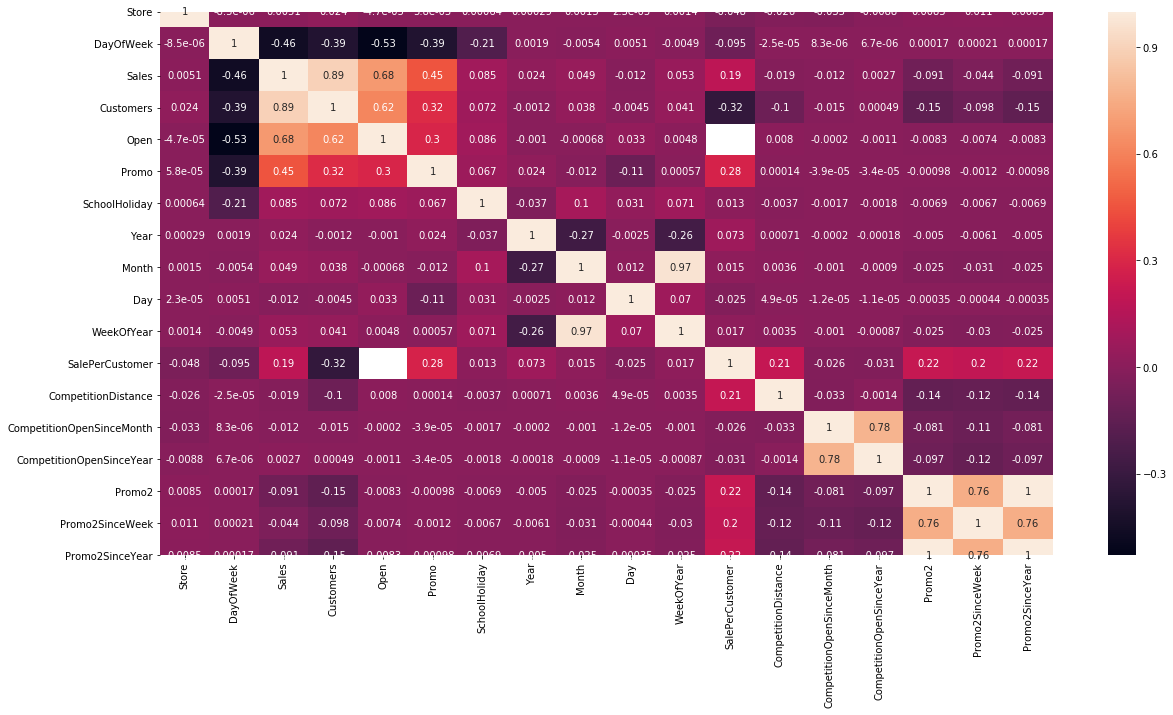

In [220]:
# Correlation
plt.figure(figsize = (20, 10))
sns.heatmap(train_store_joined.corr(), annot = True);

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


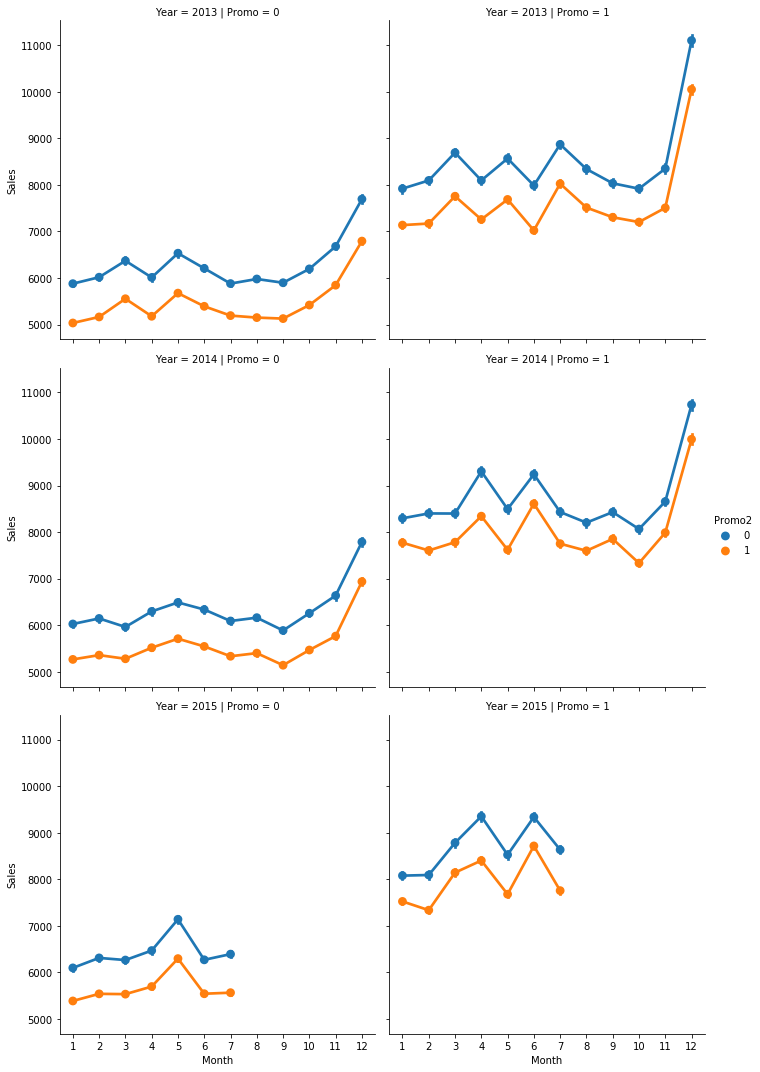

In [223]:
# Sales trend over the months
sns.factorplot(data = train_store_merged_open, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             );